In [1]:

# Importing required libraries

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pylab as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 15})

# Text Pre-processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from collections import Counter

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
import pickle
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Model Validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

#Model Building
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Model Accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report

# To save & load models
from pickle import dump
from pickle import load

#Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
hotels = pd.read_csv("hotels.csv")

In [3]:
hotels.head()

,Hotel Name,Rating,Reviews
0,1. Monet Garden Hotel Amsterdam,4.5 of 5 bubbles,"1,026 reviews"
1,2. Ambassade Hotel,5 of 5 bubbles,"2,783 reviews"
2,3. Hotel Jakarta Amsterdam,4.5 of 5 bubbles,"1,968 reviews"
3,4. Van der Valk Hotel Amsterdam - Amstel,4.5 of 5 bubbles,"1,469 reviews"
4,5. The Toren,5 of 5 bubbles,"3,464 reviews"


In [4]:
hotels = hotels.rename(columns={'Hotel Name': 'Hotel_Name'})

In [5]:
hotels.head()

,Hotel_Name,Rating,Reviews
0,1. Monet Garden Hotel Amsterdam,4.5 of 5 bubbles,"1,026 reviews"
1,2. Ambassade Hotel,5 of 5 bubbles,"2,783 reviews"
2,3. Hotel Jakarta Amsterdam,4.5 of 5 bubbles,"1,968 reviews"
3,4. Van der Valk Hotel Amsterdam - Amstel,4.5 of 5 bubbles,"1,469 reviews"
4,5. The Toren,5 of 5 bubbles,"3,464 reviews"


In [6]:
#hotels['Hotel_Name'] = hotels['Hotel_Name'].str.replace(r'^\d+\.\s+', '')
hotels['Hotel_Name'] = hotels['Hotel_Name'].str.extract(r'\d+\.\s(.*)')


In [7]:
# Remove 'reviews' from the 'Reviews' column
hotels['Reviews'] = hotels['Reviews'].str.replace(' reviews', '')

In [8]:
# Remove numbers and points from the beginning of rating values
hotels['Rating'] = hotels['Rating'].str.split(' ').str[0]

In [9]:
# Display the updated DataFrame
print(hotels)

                                 Hotel_Name Rating Reviews
0              Monet Garden Hotel Amsterdam    4.5   1,026
1                           Ambassade Hotel      5   2,783
2                   Hotel Jakarta Amsterdam    4.5   1,968
3     Van der Valk Hotel Amsterdam - Amstel    4.5   1,469
4                                 The Toren      5   3,464
...                                     ...    ...     ...
1012            Hotel Restaurant Old Bridge      2      91
1013                     Hotel La Belle Vue      2     363
1014                            Hotel Jimmy      2      94
1015                          Hotel Croydon      2     157
1016                       Aston City Hotel    1.5     404

[1017 rows x 3 columns]


In [10]:
hotels.dtypes

Hotel_Name    object
Rating        object
Reviews       object
dtype: object

In [11]:
# Data cleaning
hotels['Hotel_Name'] = hotels['Hotel_Name'].str.strip()
hotels['Reviews'] = hotels['Reviews'].str.replace(',', '')
hotels['Reviews'] = hotels['Reviews'].str.extract(r'(\d+)').astype(int)
hotels['Rating'] = pd.to_numeric(hotels['Rating'])

print(hotels)

                                 Hotel_Name  Rating  Reviews
0              Monet Garden Hotel Amsterdam     4.5     1026
1                           Ambassade Hotel     5.0     2783
2                   Hotel Jakarta Amsterdam     4.5     1968
3     Van der Valk Hotel Amsterdam - Amstel     4.5     1469
4                                 The Toren     5.0     3464
...                                     ...     ...      ...
1012            Hotel Restaurant Old Bridge     2.0       91
1013                     Hotel La Belle Vue     2.0      363
1014                            Hotel Jimmy     2.0       94
1015                          Hotel Croydon     2.0      157
1016                       Aston City Hotel     1.5      404

[1017 rows x 3 columns]


In [12]:
# Filter rows with at least 50 reviews
filtered_hotels = hotels[hotels['Reviews'] >= 50]
print(filtered_hotels)

                                 Hotel_Name  Rating  Reviews
0              Monet Garden Hotel Amsterdam     4.5     1026
1                           Ambassade Hotel     5.0     2783
2                   Hotel Jakarta Amsterdam     4.5     1968
3     Van der Valk Hotel Amsterdam - Amstel     4.5     1469
4                                 The Toren     5.0     3464
...                                     ...     ...      ...
1012            Hotel Restaurant Old Bridge     2.0       91
1013                     Hotel La Belle Vue     2.0      363
1014                            Hotel Jimmy     2.0       94
1015                          Hotel Croydon     2.0      157
1016                       Aston City Hotel     1.5      404

[598 rows x 3 columns]


In [13]:
# Print unique values of 'Rating' column
unique_ratings = filtered_hotels['Rating'].unique()
print(unique_ratings)

[4.5 5.  4.  3.5 3.  2.5 2.  1.5]


In [14]:
# Sort hotels by rating and reviews in descending order
sorted_hotels = filtered_hotels.sort_values(['Rating', 'Reviews'], ascending=[False, False])

# Initialize an empty list to store the selected hotels
selected_hotels_list = []

# Iterate over each unique rating
for rating in sorted_hotels['Rating'].unique():
    # Filter hotels with the current rating and select the top 10 with the highest number of reviews
    rating_hotels = sorted_hotels[sorted_hotels['Rating'] == rating].head(10)
    
    # Append the selected hotels to the list
    selected_hotels_list.append(rating_hotels)

# Concatenate all DataFrames in the list into a single DataFrame
selected_hotels = pd.concat(selected_hotels_list)

# Reset the index of the resulting DataFrame
selected_hotels = selected_hotels.reset_index(drop=True)

# Print the selected hotels
print(selected_hotels)



                       Hotel_Name  Rating  Reviews
0                       The Toren     5.0     3464
1                 Ambassade Hotel     5.0     2783
2       Waldorf Astoria Amsterdam     5.0     2203
3                   Mauro Mansion     5.0     1270
4    Barrio Amsterdam Guest House     5.0     1070
..                            ...     ...      ...
68                 Hotel Barbacan     2.0      278
69        Amsterdam Hostel Centre     2.0      180
70               Aston City Hotel     1.5      404
71                  blossoms City     1.5      389
72  Amsterdam Guesthouse Sarphati     1.5      279

[73 rows x 3 columns]


In [15]:
selected_hotels.to_csv('selected_hotels.csv', index=False)

In [16]:
df = pd.read_csv("combined_data.csv")

In [17]:
df.head()

,Hotel Name,Rating,Reviews,Reviewer Name,Review Rating,Review,Date of Stay,Trip Type,Response Text
0,Ambassade Hotel,5.0,2783,Dejneris L,5.0,"A good place. Hospitable staff , clean room an...",May 2023,Traveled with friends,"Dear Sir, We are really happy and proud to see..."
1,Ambassade Hotel,5.0,2783,MK024,5.0,WOW... this truly is a special property. We ch...,March 2023,NaN,"Hello MK024, This is just the best review eve..."
2,Ambassade Hotel,5.0,2783,Skip G,4.0,We were in Amsterdam for the Vermeer show and ...,May 2023,Traveled as a couple,Thank you for visiting and thank you for infor...
3,Ambassade Hotel,5.0,2783,A keen traveller,5.0,We had such a lovely stay at the Ambassade. Ev...,May 2023,Traveled as a couple,"Dear Keen Traveller, We are so grateful after ..."
4,Ambassade Hotel,5.0,2783,kathdodd,4.0,The Ambassade hotel is in a terrific location....,May 2023,Traveled as a couple,"Thank you very much for your nice words, Ms Do..."


In [18]:
import random

# Group the dataset by reviewer name
grouped_df = df.groupby('Reviewer Name')

# Initialize an empty list to store the selected reviews
selected_reviews = []

# Iterate over each group
for reviewer_name, group in grouped_df:
    # Check if the group has reviewed multiple hotels
    unique_hotels = group['Hotel Name'].unique()
    if len(unique_hotels) > 1:
        # Randomly sample a review from the group
        selected_review = group.sample(n=1)[['Reviewer Name', 'Hotel Name', 'Rating', 'Review']]
        selected_reviews.append(selected_review)

        # Check if the desired number of reviews have been selected
        if len(selected_reviews) >= 1000:
            break

# Check if any reviews were selected
if len(selected_reviews) > 0:
    # Concatenate the selected reviews into a single DataFrame
    selected_reviews_df = pd.concat(selected_reviews, ignore_index=True)

    # Save the selected reviews to a CSV file
    selected_reviews_df.to_csv('selected_reviews.csv', index=False)
else:
    print("No reviews from unique users found.")


In [19]:
# Calculate the count of unique hotel names
unique_hotel_count = df['Hotel Name'].nunique()

# Print the count of unique hotel names
print("Unique Hotel Count:", unique_hotel_count)

Unique Hotel Count: 70


In [20]:
# Group the DataFrame by "Hotel Name" and count the number of responses
response_counts = df.groupby('Hotel Name')['Response Text'].count()

# Create a new column for the response count in the original DataFrame
df['Response Count'] = df['Hotel Name'].map(response_counts)

# Print the updated DataFrame
df.head()

,Hotel Name,Rating,Reviews,Reviewer Name,Review Rating,Review,Date of Stay,Trip Type,Response Text,Response Count
0,Ambassade Hotel,5.0,2783,Dejneris L,5.0,"A good place. Hospitable staff , clean room an...",May 2023,Traveled with friends,"Dear Sir, We are really happy and proud to see...",1617
1,Ambassade Hotel,5.0,2783,MK024,5.0,WOW... this truly is a special property. We ch...,March 2023,NaN,"Hello MK024, This is just the best review eve...",1617
2,Ambassade Hotel,5.0,2783,Skip G,4.0,We were in Amsterdam for the Vermeer show and ...,May 2023,Traveled as a couple,Thank you for visiting and thank you for infor...,1617
3,Ambassade Hotel,5.0,2783,A keen traveller,5.0,We had such a lovely stay at the Ambassade. Ev...,May 2023,Traveled as a couple,"Dear Keen Traveller, We are so grateful after ...",1617
4,Ambassade Hotel,5.0,2783,kathdodd,4.0,The Ambassade hotel is in a terrific location....,May 2023,Traveled as a couple,"Thank you very much for your nice words, Ms Do...",1617


In [21]:
# Change the column name from "Reviews" to "Total Reviews"
df = df.rename(columns={'Reviews': 'Total Reviews'})

# Create a new column " Reviews" with the count of English reviews for each hotel
df['English Reviews'] = df.groupby('Hotel Name')['Review'].transform('count')

# Print the updated DataFrame
df.head()

,Hotel Name,Rating,Total Reviews,Reviewer Name,Review Rating,Review,Date of Stay,Trip Type,Response Text,Response Count,English Reviews
0,Ambassade Hotel,5.0,2783,Dejneris L,5.0,"A good place. Hospitable staff , clean room an...",May 2023,Traveled with friends,"Dear Sir, We are really happy and proud to see...",1617,2285
1,Ambassade Hotel,5.0,2783,MK024,5.0,WOW... this truly is a special property. We ch...,March 2023,NaN,"Hello MK024, This is just the best review eve...",1617,2285
2,Ambassade Hotel,5.0,2783,Skip G,4.0,We were in Amsterdam for the Vermeer show and ...,May 2023,Traveled as a couple,Thank you for visiting and thank you for infor...,1617,2285
3,Ambassade Hotel,5.0,2783,A keen traveller,5.0,We had such a lovely stay at the Ambassade. Ev...,May 2023,Traveled as a couple,"Dear Keen Traveller, We are so grateful after ...",1617,2285
4,Ambassade Hotel,5.0,2783,kathdodd,4.0,The Ambassade hotel is in a terrific location....,May 2023,Traveled as a couple,"Thank you very much for your nice words, Ms Do...",1617,2285


In [22]:
# Print the total amount of reviews
total_reviews = len(df)
print("Total number of reviews:", total_reviews)

Total number of reviews: 106837


In [23]:
import matplotlib.pyplot as plt

(array([ 2866.,  4728.,     0.,  9016.,     0., 10585., 33119.,     0.,
        35049., 11474.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Hotel Rating Distribution')

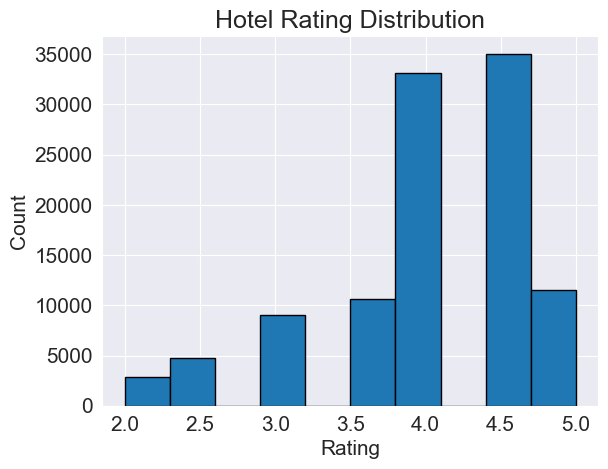

In [24]:
# Convert the 'Rating' column to numeric values
df['Rating'] = pd.to_numeric(df['Rating'])

# Plotting the histogram
plt.hist(df['Rating'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Hotel Rating Distribution')

# Display the plot
plt.show()

<BarContainer object of 70 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69],
 [Text(0, 0, 'DoubleTree by Hilton Amsterdam Centraal Station'),
  Text(1, 0, 'Movenpick Hotel Amsterdam City Centre'),
  Text(2, 0, 'citizenM Amsterdam South'),
  Text(3, 0, 'Ibis Amsterdam Centre'),
  Text(4, 0, 'WestCord Fashion Hotel Amsterdam'),
  Text(5, 0, 'Hotel Estherea'),
  Text(6, 0, 'Grand Hotel Amrath Amsterdam'),
  Text(7, 0, 'Hotel Nadia'),
  Text(8, 0, 'Renaissance Amsterdam Hotel'),
  Text(9, 0, 'XO Hotels Park West'),
  Text(10, 0, 'Radisson Blu Hotel, Amsterdam City Center'),
  Text(11, 0, 'Banks Mansion'),
  Text(12, 0, 'Inntel Hotels Amsterdam Centre'),
  Text(1

Text(0.5, 0, 'Hotel Name')

Text(0, 0.5, 'Review Count')

Text(0.5, 1.0, 'Review Count by Hotel')

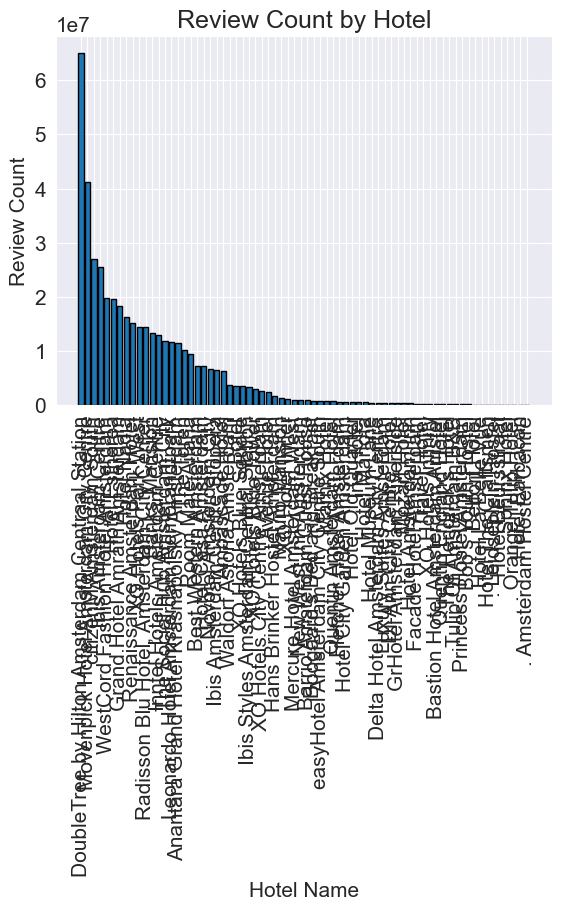

In [25]:
# Group the data by hotel name and calculate the total review count for each hotel
review_counts = df.groupby('Hotel Name')['Total Reviews'].sum().reset_index()

# Sort the data by review count in descending order
review_counts = review_counts.sort_values('Total Reviews', ascending=False)

# Plotting the bar chart
plt.bar(review_counts['Hotel Name'], review_counts['Total Reviews'], edgecolor='black')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Hotel Name')
plt.ylabel('Review Count')
plt.title('Review Count by Hotel')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'DoubleTree by Hilton Amsterdam Centraal Station'),
  Text(1, 0, 'Movenpick Hotel Amsterdam City Centre'),
  Text(2, 0, 'citizenM Amsterdam South'),
  Text(3, 0, 'Ibis Amsterdam Centre'),
  Text(4, 0, 'WestCord Fashion Hotel Amsterdam'),
  Text(5, 0, 'Hotel Estherea'),
  Text(6, 0, 'Grand Hotel Amrath Amsterdam'),
  Text(7, 0, 'Hotel Nadia'),
  Text(8, 0, 'Renaissance Amsterdam Hotel'),
  Text(9, 0, 'XO Hotels Park West')])

Text(0.5, 0, 'Hotel Name')

Text(0, 0.5, 'Review Count')

Text(0.5, 1.0, 'Review Count by Hotel (Top 10)')

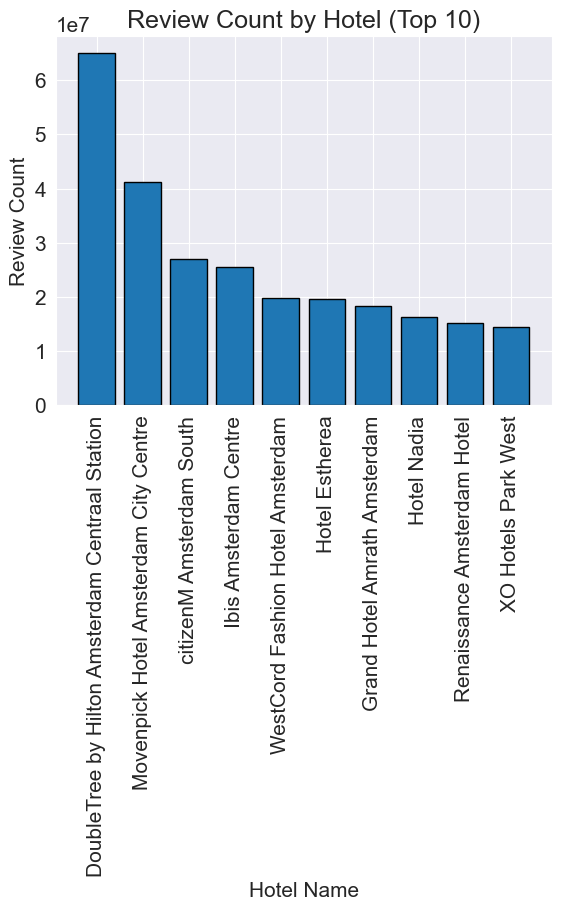

In [26]:
# Set the number of top hotels to display
top_n = 10

# Select the top N hotels with the highest review counts
top_hotels = review_counts.head(top_n)

# Plotting the bar chart
plt.bar(top_hotels['Hotel Name'], top_hotels['Total Reviews'], edgecolor='black')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Hotel Name')
plt.ylabel('Review Count')
plt.title('Review Count by Hotel (Top {})'.format(top_n))

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()

<BarContainer object of 7 artists>

Text(0.5, 0, 'Hotel Rating')

Text(0, 0.5, 'Number of Reviews')

Text(0.5, 1.0, 'Number of Reviews by Hotel Rating')

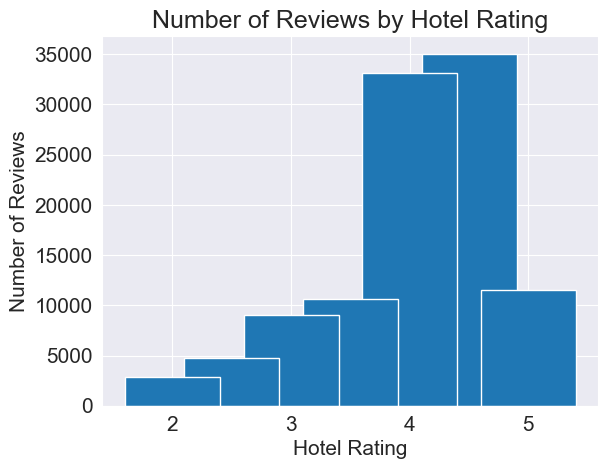

Text(0.5, 0, 'Hotel Rating')

Text(0, 0.5, 'Average Number of Responses')

Text(0.5, 1.0, 'Average Number of Responses by Hotel Rating')

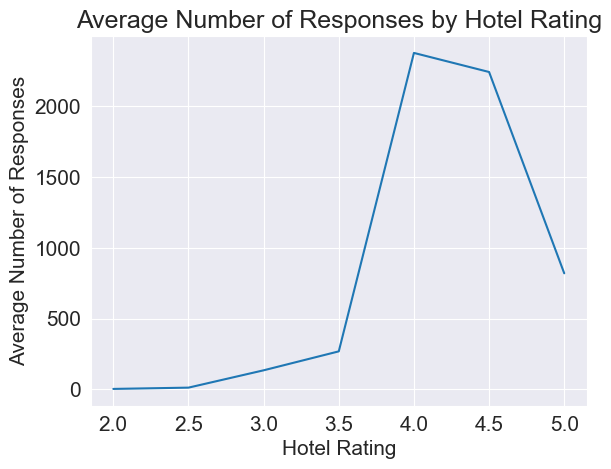

In [27]:
# Count the number of reviews for each rating
rating_counts = df['Rating'].value_counts()

# Calculate the average number of responses for each rating
rating_responses = df.groupby('Rating')['Response Count'].mean()

# Plot the data
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Hotel Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Hotel Rating')
plt.show()

# Convert rating_responses index and values to numpy arrays before plotting
plt.plot(rating_responses.index.to_numpy(), rating_responses.to_numpy())
plt.xlabel('Hotel Rating')
plt.ylabel('Average Number of Responses')
plt.title('Average Number of Responses by Hotel Rating')
plt.show()


In [28]:
def classify_rating(review_rating):
    if review_rating <= 3:
        return 0
    else:
        return 1


In [29]:
# sentiment maped into 2 class 1=Positive reviews 0=Negtaive reviews
df['Sentiment'] = df['Review Rating'].apply(classify_rating)
df[df['Review Rating'] == 3]

,Hotel Name,Rating,Total Reviews,Reviewer Name,Review Rating,Review,Date of Stay,Trip Type,Response Text,Response Count,English Reviews,Sentiment
26,Ambassade Hotel,5.0,2783,Virginia B,3.0,The breakfast was highly over priced and a bas...,May 2023,NaN,Thank you very much for your visit of last wee...,1617,2285,0
262,Ambassade Hotel,5.0,2783,RNorthey,3.0,PROS: A boutique hotel in an excellent locatio...,May 2022,NaN,"Dear Madam, Thank you very much for sharing y...",1617,2285,0
367,Ambassade Hotel,5.0,2783,RHC09,3.0,"The pros: great location, handy for the museum...",November 2021,NaN,"Dear @RHC09, Thank you for staying at the Amb...",1617,2285,0
552,Ambassade Hotel,5.0,2783,Gaby F,3.0,"Had a 4 day stay at this hotel, great location...",December 2019,NaN,"Dear Madam, We wish to thank you for chosing ...",1617,2285,0
644,Ambassade Hotel,5.0,2783,Jerome,3.0,"Our room was very small, and cluttered with us...",September 2019,NaN,"Dear Bookman1900, We wish to thank you for st...",1617,2285,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106826,XO Hotel Inner,3.0,1069,bianncia,3.0,Quick check-in. Not enough safes and the lugga...,August 2007,NaN,NaN,79,1069,0
106827,XO Hotel Inner,3.0,1069,Lawyergirl25,3.0,"3 of us stayed at thie ""hotel"" between 25-27 J...",July 2007,NaN,NaN,79,1069,0
106829,XO Hotel Inner,3.0,1069,tigercar84,3.0,This hotel is good for a short stopover but no...,June 2007,NaN,NaN,79,1069,0
106832,XO Hotel Inner,3.0,1069,travelgirl07,3.0,This hostel was nicer than I was expecting. Ex...,June 2007,NaN,NaN,79,1069,0


<Axes: xlabel='Review Rating', ylabel='count'>

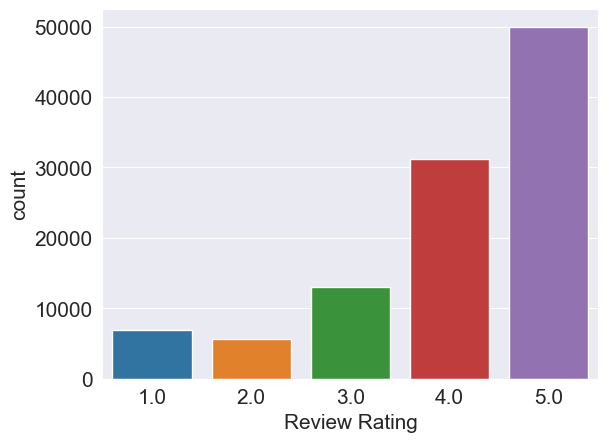

In [30]:
# Create the countplot
sns.countplot(x='Review Rating', data=df)

# Display the plot
plt.show()


<Axes: xlabel='Sentiment', ylabel='count'>

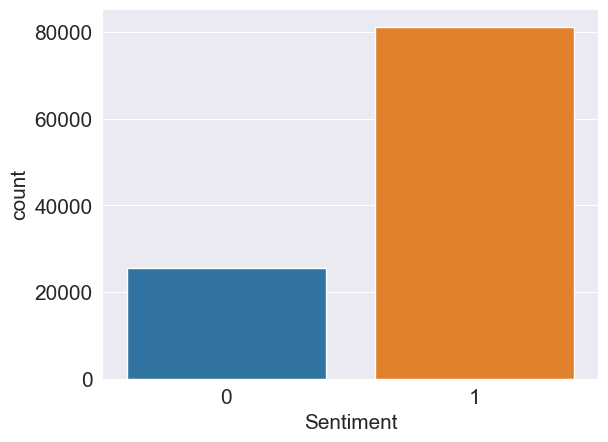

In [31]:
# 1 = Positive 0 = Negative
# Create the countplot
sns.countplot(x='Sentiment', data=df)

# Display the plot
plt.show()

In [32]:
# Count the number of positive and negative reviews
num_positive = df['Sentiment'].sum()
num_negative = len(df) - num_positive

In [33]:
# Calculate the percentages
total_reviews = len(df)
percentage_positive = (num_positive / total_reviews) * 100
percentage_negative = (num_negative / total_reviews) * 100

# Print the percentages
print(f"Percentage of Positive Reviews: {percentage_positive:.2f}%")
print(f"Percentage of Negative Reviews: {percentage_negative:.2f}%")

Percentage of Positive Reviews: 76.02%
Percentage of Negative Reviews: 23.98%


### Text Data Cleaning

In [34]:
# Download NLTK data (stopwords and WordNet)
nltk.download('stopwords')
nltk.download('wordnet')
#Lemmatization
wordnet=WordNetLemmatizer()

#Stop word
stop_words=stopwords.words('english')

nlp=spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olgal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\olgal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
# Varibale created for words which are not included in the stopwords
not_stopwords = ("aren", "aren't", "couldn", "couldn't", "didn", "didn't",
                 "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn",
                 "hasn't", "haven", "haven't", "isn", "isn't", "mustn",
                 "mustn't", "no", "not", "only", "shouldn", "shouldn't",
                 "should've", "wasn", "wasn't", "weren", "weren't", "will",
                 "wouldn", "wouldn't", "won't", "very")
stop_words_ = [words for words in stop_words if words not in not_stopwords]

# Additional words added in the stop word list
stop_words_.append("I")
stop_words_.append("the")
stop_words_.append("s")
print(stop_words_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can'

In [36]:
corpus = []
for i in range(0, len(df)):
    # Removal of puntuations
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])

    # Converting Text to Lower case
    review = review.lower()

    # Spliting each words - eg ['I','was','happy']
    review = review.split()

    # Applying Lemmitization for the words eg: Argument -> Argue - Using Spacy Library
    review = nlp(' '.join(review))
    review = [token.lemma_ for token in review]

    # Removal of stop words
    review = [word for word in review if word not in stop_words_]

    # Joining the words in sentences
    review = ' '.join(review)
    corpus.append(review)

In [37]:
pd.DataFrame(corpus).head()

,0
0,good place hospitable staff clean room delicio...
1,wow truly special property change hotel arrive...
2,amsterdam vermeer show stay ambassade night ho...
3,lovely stay ambassade everything hotel perfect...
4,ambassade hotel terrific location easy walk da...


In [38]:
# cleaned review added to the data frame
df['Cleaned_Review'] = corpus

In [39]:
# Finding total words in cleaned review
clean_review_words = " ".join(df['Cleaned_Review'])
clean_review_words = clean_review_words.split()

# total number of words present in cleaned reviews
len(clean_review_words)

5299002

<Axes: xlabel='Word_count_clean_review', ylabel='Count'>

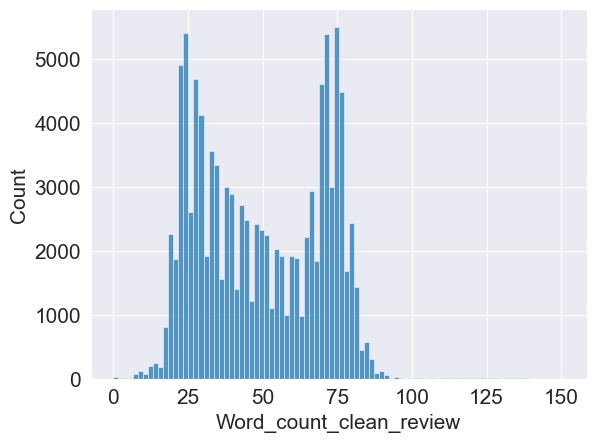

In [40]:
# Number of words in the cleaned Review
df['Word_count_clean_review'] = pd.Series(
    [len(item.split()) for item in df['Cleaned_Review']])

# most of the cleaned review have 20 to 40 words
sns.histplot(df['Word_count_clean_review'])

In [41]:
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='Black',
    colormap='Set2',
    stopwords=stop_words_,
    max_words=100,
    random_state=42,
).generate(str(corpus))


<Figure size 4000x3000 with 0 Axes>

(-0.5, 2999.5, 1999.5, -0.5)

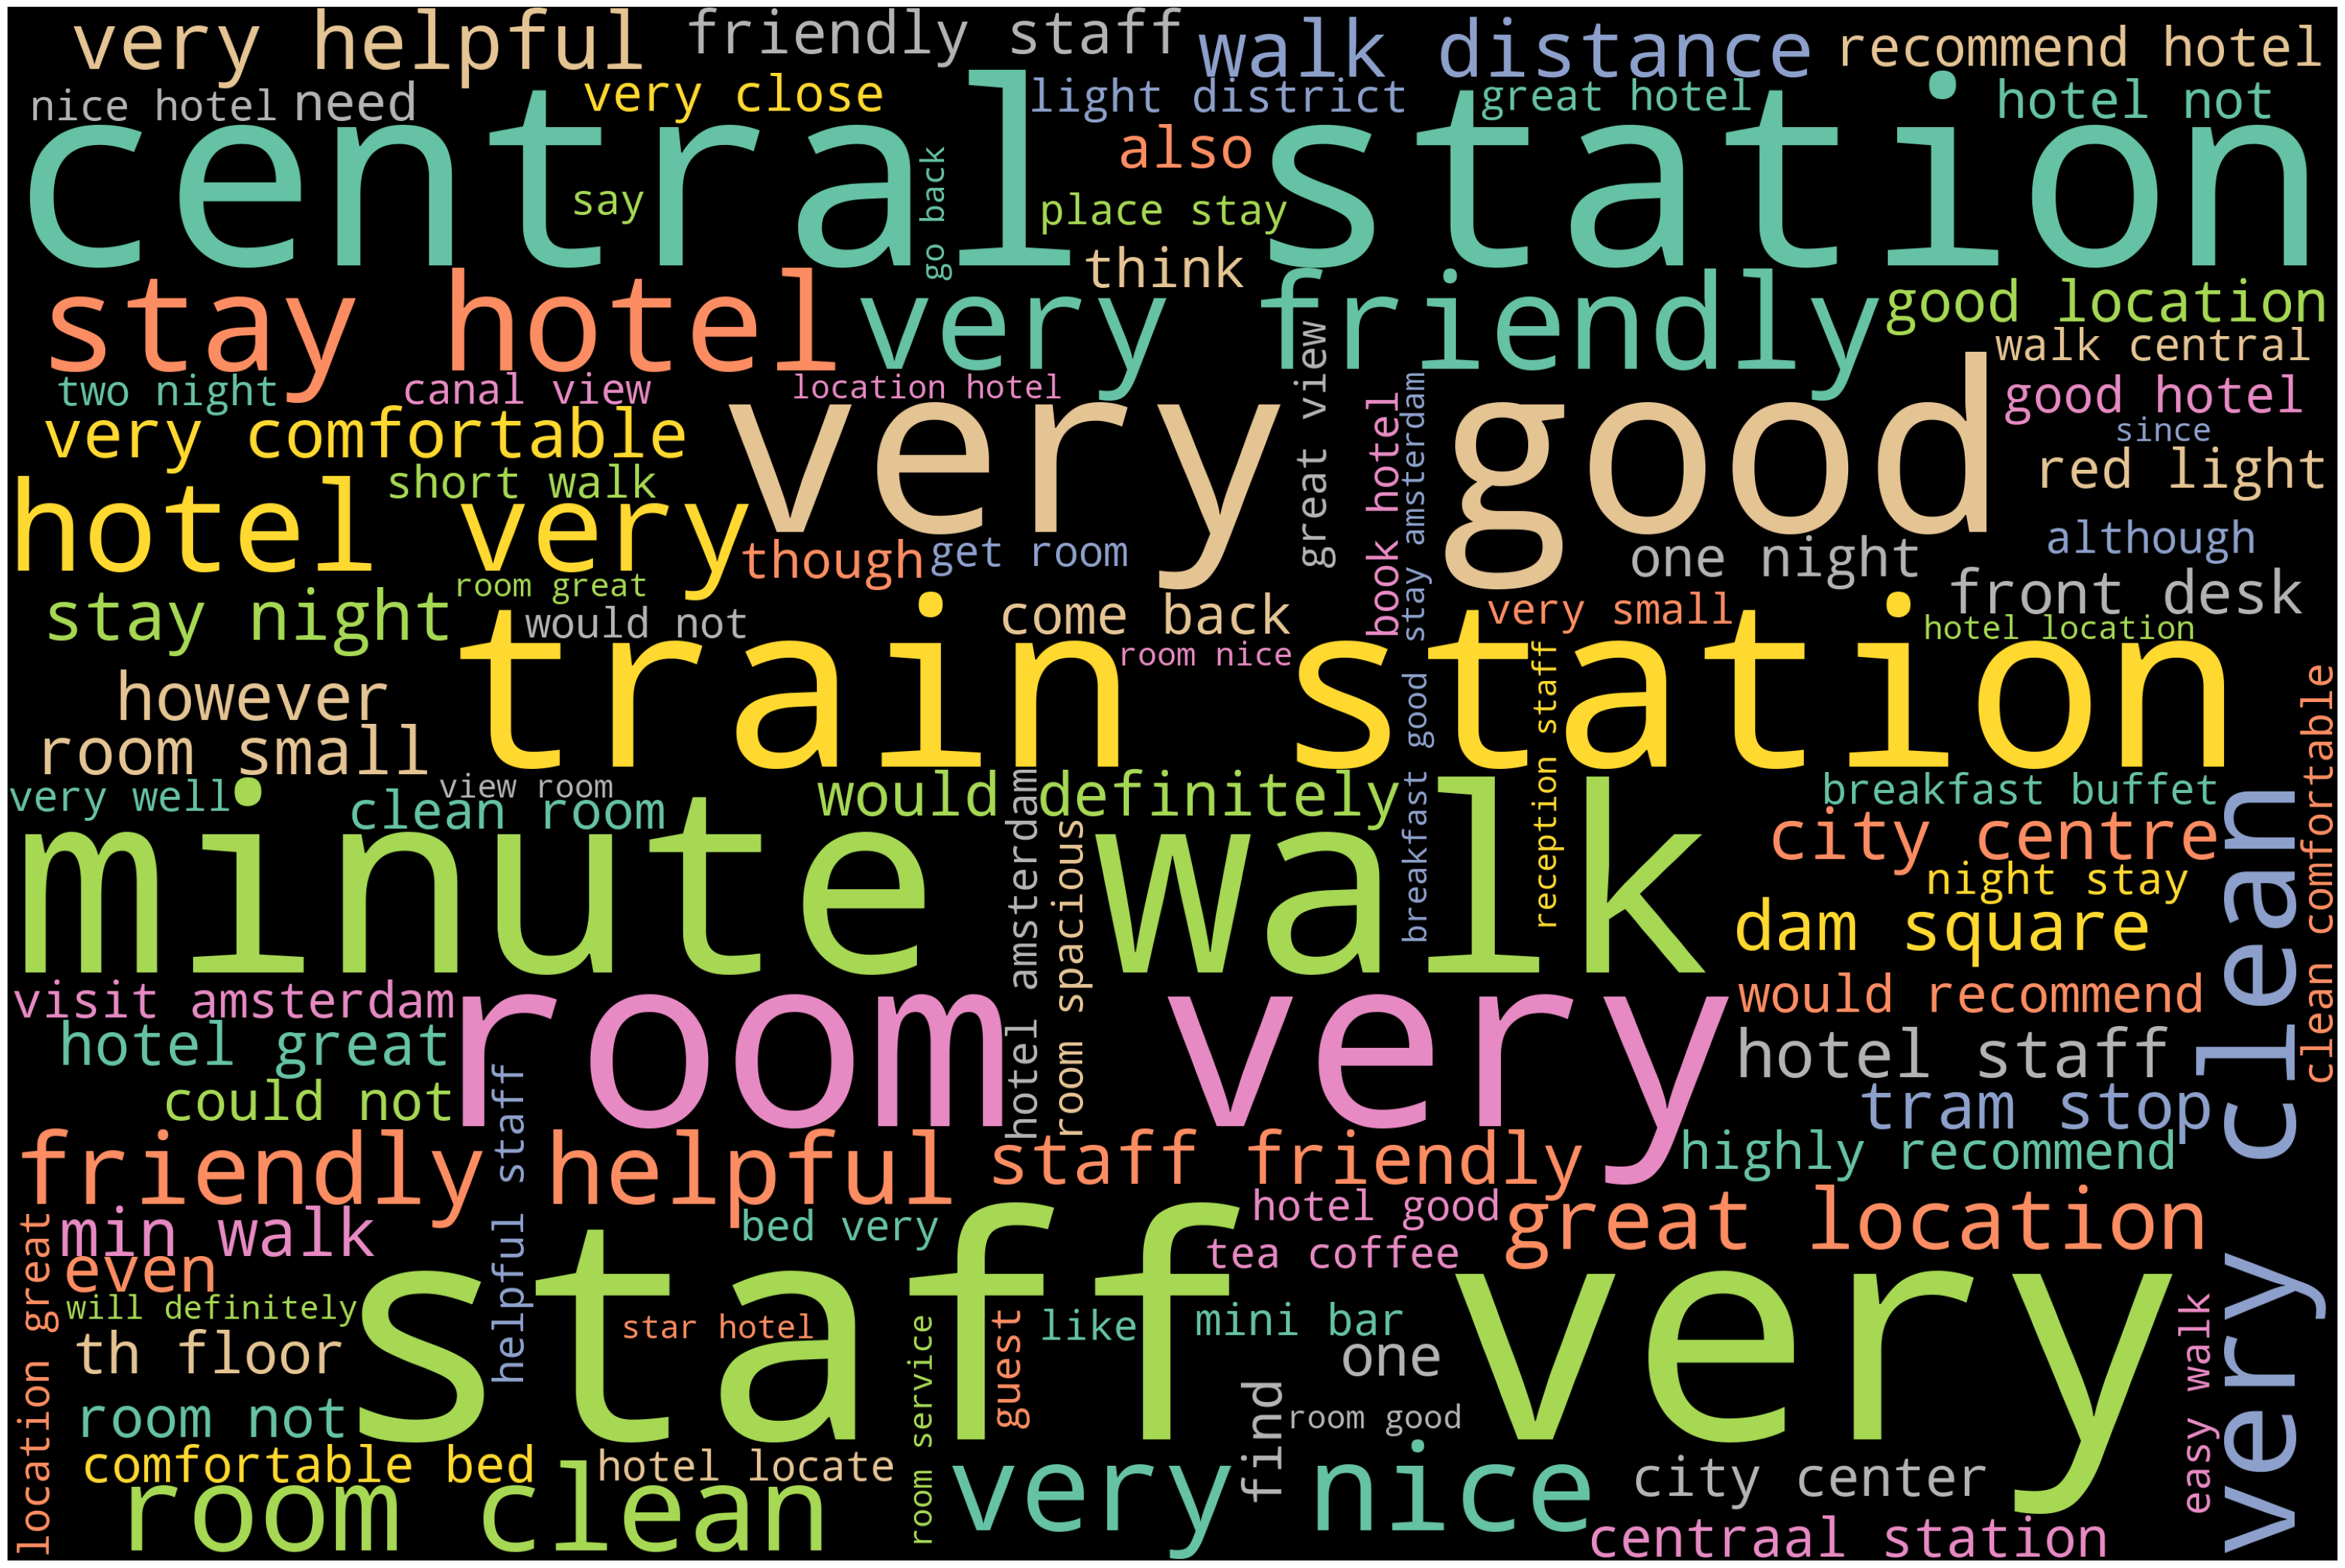

In [42]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [43]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Extract the 'Review Text' column from your DataFrame
reviews_column = df['Review']

# Convert the 'reviews_column' to a list
reviews = reviews_column.tolist()

# Define keywords for each dimension
dimension_keywords = {
    "product/service": ["service", "hotel", "amenities", "facilities"],
    "innovation": ["innovative", "features", "modern", "cutting-edge"],
    "financial performance": ["financial", "performance", "profits", "revenues"],
    "social responsibility": ["social", "responsibility", "sustainability", "community"],
    "employee relations": ["employee", "relations", "team", "communication", "staff", "employees", "work environment", "colleagues"],
    "customer orientation": ["customer", "orientation", "guest", "client"],
    "vision and leadership": ["vision", "leadership", "strategy", "direction"],
    # ... add more keywords ...
}



In [ ]:
# Initialize a Counter to keep track of keyword occurrences for each dimension
dimension_counts = {dimension: Counter() for dimension in dimension_keywords}

# Loop through each review
for review in reviews:
    # Tokenize the review text
    tokens = word_tokenize(review)
    
    # Remove stopwords
    tokens = [token for token in tokens if token.lower() not in stopwords.words('english')]
    
    # Count the occurrences of keywords for each dimension
    for dimension, keywords in dimension_keywords.items():
        dimension_counts[dimension].update(tokens)

# Calculate the total number of keywords across all dimensions
total_keywords = sum(sum(counts.values()) for counts in dimension_counts.values())

# Calculate the percentage of each dimension's keywords
dimension_percentages = {dimension: (sum(counts.values()) / total_keywords) * 100 
                         for dimension, counts in dimension_counts.items()}

# Print the percentage of each dimension's keywords
for dimension, percentage in dimension_percentages.items():
    print(f"{dimension}: {percentage:.2f}%")

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1ce029f2650>,
 [Text(-0.8883362301155295, -0.648736265568782, 'Product/Service'),
  Text(0.6431418625075758, -0.8923948367680569, 'Workplace'),
  Text(1.0551368645791883, -0.3109440415991275, 'Innovation'),
  Text(1.0721515481693404, 0.2459492991616092, 'Financial Performance'),
  Text(0.6583109340055276, 0.8812642703348241, 'Social Responsibility'),
  Text(-0.30947034836666304, 1.0555700372224557, 'Employee Relations'),
  Text(-0.7032352546539203, 0.8458487906309472, 'Customer Orientation'),
  Text(-0.8130771409383283, 0.7408816119216038, 'Vision and Leadership')],
 [Text(-0.4845470346084706, -0.3538561448556992, '42.3%'),
  Text(0.3508046522768595, -0.48676082005530363, '7.5%'),
  Text(0.5755291988613753, -0.16960584087225133, '13.5%'),
  Text(0.5848099353650947, 0.13415416317905954, '2.8%'),
  Text(0.3590786912757423, 0.4806896020008131, '19.6%'),
  Text(-0.16880200819999802, 0.5757654748486121, '9.9%'),
  Text(-0.38358286617486564, 0.461372067616880

Text(0.5, 1.0, 'Distribution of Categories')

(-1.0999998979728103,
 1.0999994919084433,
 -1.099989775071211,
 1.0999995098306248)

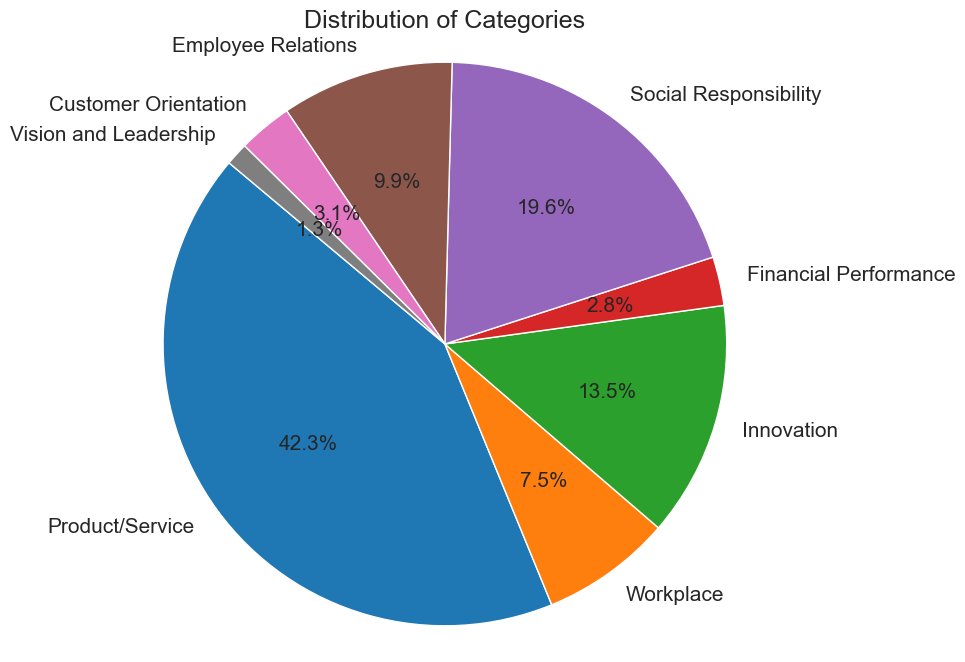

In [45]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding percentages
categories = ['Product/Service', 'Workplace', 'Innovation', 'Financial Performance', 'Social Responsibility', 'Employee Relations', 'Customer Orientation', 'Vision and Leadership']
percentages = [42.3, 7.5, 13.5, 2.8, 19.6, 9.9, 3.1, 1.3]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Categories')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
